# ДЗ №5.
#### Выполнил: Рустамов Азер

### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.metrics

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

В качестве датасета был использован обработаный датасет из домашней работы №2.

In [2]:
DATASET_PATH = "appstore_games_march_2021_3.csv"
dataset = pd.read_csv(DATASET_PATH)
dataset.columns = dataset.columns.str.strip()
dataset = dataset.drop(['Board', 'Card', 'Casino', 'Dice', 'Games', 'Music', 'Word', 'mac', 'Racing', 'Simulation', 'Sports', 'Trivia', 'Strategy'], axis=1)

In [3]:
np.random.seed(11)
random_subset = np.random.choice(np.arange(dataset.shape[0]), size=50000, replace=False)
dataset = dataset.iloc[random_subset]

In [4]:
dataset_norm = (dataset - dataset.mean(axis = 0)) / dataset.std(axis = 0)

В качестве целевого столбца был использован столбец, содеожащий информацию о внутриигровых покупках.

In [5]:
x = dataset_norm.drop(["purchases"], axis=1)
y = dataset["purchases"]
print(x.shape)
print(y.shape)

(50000, 14)
(50000,)


In [6]:
dataset.describe()

,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,Action,Adventure,Casual,Educational,Family,Puzzle,Role Playing
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.984920,120.559120,0.208569,0.353860,2.651104,288.532980,0.889060,0.963500,0.079000,0.041740,0.100800,0.000020,0.044720,0.413400,0.019420
std,3.780627,150.241151,0.847215,0.478171,2.077665,2083.264647,0.314061,0.187533,0.269741,0.199996,0.301067,0.004472,0.206691,0.492448,0.137997
min,4.000000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,32.300000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,78.500000,0.000000,0.000000,3.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,150.500000,0.000000,1.000000,4.600000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,17.000000,1536.000000,8.990000,1.000000,5.000000,40300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Разбиваем данные на обучающую и тестовую выборки

In [7]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=43)

### Обучение классификатора с одним скрытым слоем

In [8]:
model = MLPClassifier(
    hidden_layer_sizes=(100,),
    solver='adam',
    activation='relu',
    random_state=42
)

In [9]:
%%time
model.fit(x_train, y_train)

Wall time: 22.2 s


MLPClassifier(random_state=42)

In [10]:
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

### Проверка качества классификатора

In [11]:
accuracy_score(y_train, y_train_prediction)
accuracy_score(y_test, y_test_prediction)
print('[Accuracy]\n')
print('Train: {}, Test: {}'.format(
    sklearn.metrics.accuracy_score(y_train, y_train_prediction),
    sklearn.metrics.accuracy_score(y_test, y_test_prediction)
))

[Accuracy]

Train: 0.7293066666666667, Test: 0.72576


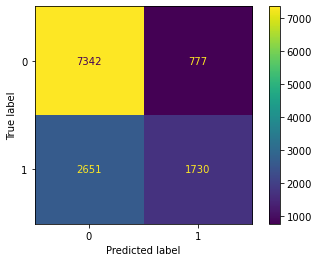

In [12]:
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Обучение классификатора с двумя скрытыми слоями

In [13]:
model = MLPClassifier(
    hidden_layer_sizes=(10, 20),
    solver='adam',
    activation='relu',
    random_state=44
)

In [14]:
%%time
model.fit(x_train, y_train)

Wall time: 18.9 s


MLPClassifier(hidden_layer_sizes=(10, 20), random_state=44)

### Проверка качества классификатора

In [15]:
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)
accuracy_score(y_train, y_train_prediction)
accuracy_score(y_test, y_test_prediction)
print('[Accuracy]\n')
print('Train: {}, Test: {}'.format(
    sklearn.metrics.accuracy_score(y_train, y_train_prediction),
    sklearn.metrics.accuracy_score(y_test, y_test_prediction)
))

[Accuracy]

Train: 0.72536, Test: 0.72088


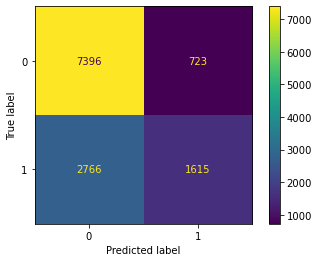

In [16]:
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

#### Подбор параметра `alpha`

In [17]:
alpha_arr = np.logspace(-5, 3, 15)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

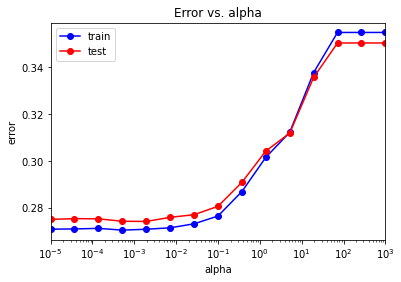

In [18]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

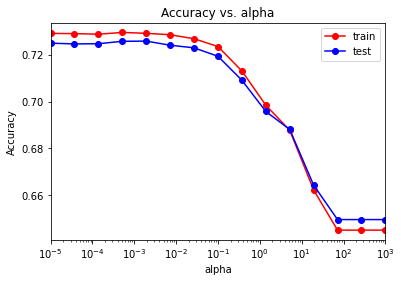

In [19]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

При увеличении `alpha` уменьшается точность модели. Значительного переобучения не наблюдается. Недообучение возникает при больших `alpha`

In [20]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.2704533333333333 0.27416


### Оптимальное значение `alpha`

In [21]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.0019307]


#### Подбор числа нейронов

In [22]:
neuron_count_array = np.linspace(10, 300, 30).astype(int)
test_error = []
train_error = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt[0],
        hidden_layer_sizes=(neuron_count,),
        solver='adam',
        activation ='relu',
        max_iter=1000,
        random_state = 42
    )
    model.fit(x_train, y_train)

    y_train_prediction = model.predict(x_train)
    y_test_prediction = model.predict(x_test)

    test_error.append(np.mean(y_test != y_test_prediction))
    train_error.append(np.mean(y_train != y_train_prediction)) 

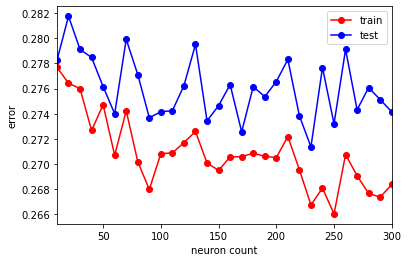

In [23]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend() 

In [27]:
min_train_err = np.min(train_error)
min_test_err = np.min(test_error)
print(min_train_err, min_test_err)

0.2660266666666667 0.27136


Явной зависимости ошибки от числа нейронов не наблюдается, но можно отметить несколько оптимальных значений.

### Оптимальное число нейронов

In [24]:
min_test_error = np.min(test_error)
neuron_count_opt = neuron_count_array[test_error == min_test_error][0]
print('Optimal neuron count: {}'.format(neuron_count_opt)) 

Optimal neuron count: 230


### Подбор оптимального значения параметра `alpha` и числа нейронов

In [25]:
neuron_arr = np.linspace(10, 300, 5).astype(int)
alpha_arr = np.logspace(-5, 3, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
opts_neuron_arr = []
opts_alpha_arr = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron,), 
                                  solver = 'adam', activation = 'relu', max_iter=1000, random_state = 30)
        mlp_model.fit(x_train, y_train)

        y_train_pred = mlp_model.predict(x_train)
        y_test_pred = mlp_model.predict(x_test)

        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        opts_neuron_arr.append([neuron, alpha])


Оптимальные значения `alpha` и числа нейронов, а также значение ошибки на тестовой выборке при этих параметрах

In [26]:
min_test_error = np.min(test_err)
i,  = np.where(test_err == min_test_error)
neuron_opt, alpha_opt = opts_neuron_arr[i[0]]
print("Neuron count opt:", neuron_opt)
print("Alpha opt: ", alpha_opt)
print("Min test error: ", min_test_error)

Neuron count opt: 82
Alpha opt:  1e-05
Min test error:  0.27384


## Выводы
* При больших значениях параметра регуляризации `alpha` наблюдается недообучение
* Подбор оптимального числа нейронов повысил точность на тестовой выборке;
 